# Python数据分析之展示-1

## 1.Matplotlib 基础

Matplotlib是一个Python的2D图形包。pyplot封装了很多画图的函数。

导入相关的包:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.pyplot包含一系列类似 MATLAB中绘图函数的相关函数。每个matplotlib.pyplot中的函数对当前的图像进行些修改,例如:产生新的图像,在图像中产生新的绘图区域,在绘图区域中画线, 给绘图加上标记,等..... matplotlib pyplot会自动记住当前的图像和绘图区域,因此这些函数会直接作用在当前的图像上。

在实际的使用过程中,常常以plt作为matplotlib.pyplot的省略。

### plt.show()函数

默认情况下, matplotlib. pyplot不会直接显示图像,只有调用plt. show()函数时,图像才会显示出来。

plt.show()默认是在新窗口打开一幅图像.并且提供了对图像进行操作的按钮。

不过在ipython命令行中,我们可以将它插入notebook中,并且不需要调用plt. show()也可以显示:

* %matplotlib notebook
* %matplotlib inline

不过在实际写程序中,我们还是习惯调用plt.show()函数将图像显示出来。

In [16]:
%matplotlib inline

### plt.plot()函数

#### 例子

plt.plot()函数可以用来绘制线型图：

Text(0.5, 0, 'x')

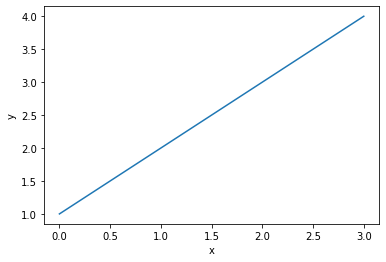

In [21]:
plt.plot([1,2,3,4])
plt.ylabel('y')
plt.xlabel('x')

#### 基本用法

plot函数的基本用法：

指定x和y

* plt.plot(x,y) 

默认参数，x为0到(n-1)

* plt.plot(y)

因此,在上面的例子中,我们没有给定x的值,所以其默认值为[0, 1,2, 3]。

传入x和y :

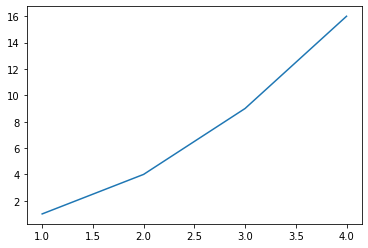

In [22]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

#### 字符参数

和MATLAB中类似，我们还可以用字符来指定绘图的格式

表示颜色的字符有：

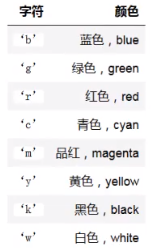

表示类型的字符有：

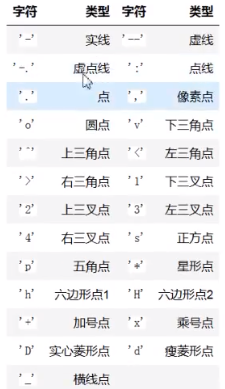

例如我们要画出红色圆点:

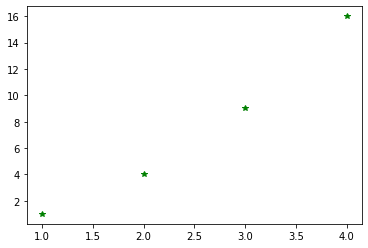

In [25]:
plt.plot([1,2,3,4],[1,4,9,16],'g*')
plt.show()

可以看出,有两个点在图像的边缘,因此,我们需要改变轴的显示范围.

#### 显示范围

与MatLab类似，我们这里可以使用axis函数指定坐标轴显示的范围:

    plt.axis([xmin, xmax, ymin, ymax])

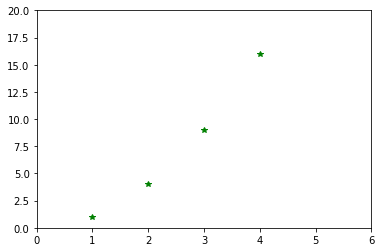

In [26]:
plt.plot([1,2,3,4],[1,4,9,16],'g*')
plt.axis([0,6,0,20])
plt.show()

#### 传入Numpy数组

之前我们传给plot的参数都是列表,事实上，向plot中传入numpy数组是更常用的做法。事实上,如果传入的是列表, matplotlib会在内部将它转化成数组再进行处理:

在一个图里画多条线

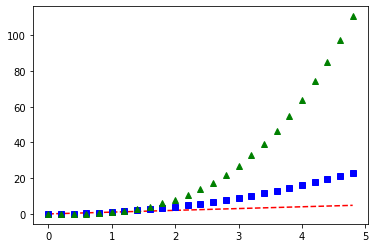

In [30]:
t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',
         t,t**2,'bs',
         t,t**3,'g^')
plt.show()

#### 传入多组数据

事实上,在上面的例子中,我们不仅仅向plot函数传入了数组,还传入了多组(x, y, format_ str) 参数,它们在同一张图上显示。这意味着我们不需要使用多个plot函数来画多组数组,只需要可以将这些组合放到一个plot函数中去即可。(例子在上面)

#### 线条属性

之前提到,我们可以用字符串来控制线条的属性,事实上还可以通过关键词来改变线条的性质,例如' linwidth' 可以改变线条的宽度, color可以改变线条的颜色:

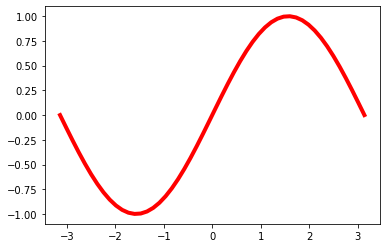

In [37]:
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
plt.plot(x,y,linewidth=4.0,color='r')
plt.show()

#### 使用plt.plot() 的返回值来设置线条属性

plot函数返回-一个Line2D对象组成的列表,每个对象代表输入的一对组合,例如:

* line1, line2为两个Line2D对象

    linel，line2 = plt. plot(x1，y1， x2， y2)

* 返回3个Line2D对象组成的列表

    lines = plt.plot(x1, y1, x2, y2, x3, y3)

我们可以使用这个返回值来对线条属性进行设置:

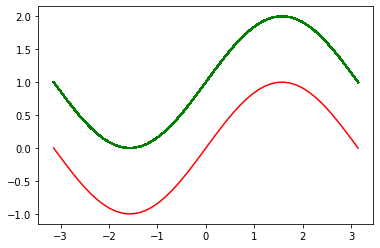

In [40]:
line1,line2=plt.plot(x,y,'r',x,y+1,'g-')
line2.set_antialiased(False) # 抗锯齿函数
plt.show()

#### plt.setp()修改线条性质

更方便的做法是使用plt的setp函数:

[None, None]

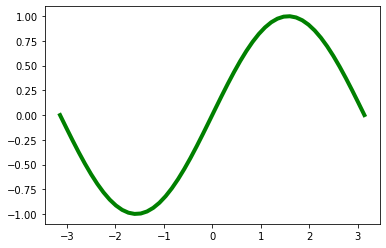

In [43]:
line = plt.plot(x,y)
# plt.setp(line,color='g',linewidth=4)
plt.setp(line,'color','g','linewidth',4)

### 子图

`figure()` 函教会产生一个指定编号为num的图:

    plt.figure(num)

这里, figure(1)其实是可以省略的,因为默认情况下plt会自动产生一幅图像。

使用subplot可以在一副图中生成多个子图 ,其参数为:

    plt.subplot (numrows，numcols，fignum)

当numrows * numcols < 10 时,中间的逗号可以省略,因此plt.subplot (211)就相当于plt. subplot(2, 1, 1)。

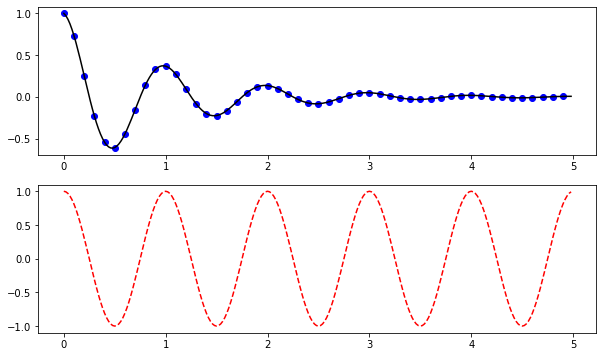

In [48]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0,5.0,0.1)
t2 = np.arange(0.0,5.0,0.02)

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')
plt.show()